# Réseaux neurone - Blog lulu (lucidar)

## Ressources  
* https://lucidar.me/fr/neural-networks/summary/       Tuto à suivre
* https://keras.io/getting_started/
* https://machinelearningmastery.com/visualize-deep-learning-neural-network-model-keras/  Cours machine Learning keras, mais beaucoup d'autres ressources
* https://realpython.com/python-keras-text-classification/    Tuto à suivre

    

## Le réseau de neurones le plus simple avec TensorFlow  
* https://lucidar.me/fr/neural-networks/summary/
* https://www.skynettoday.com/overviews/neural-net-history  

You'll find more information and detailed explainations about this simple neural network on [my blog](https://lucidar.me/en/neural-networks/simplest-neural-netwok-ever/).

### Import libraries and create noisy data

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf

#----------------------------------------------------------------------------------------------------------
#
# Création du jeu de données pour l'apprentissage.
# x_data est composé de 100000 points, et un bruit normal est ajouté sur l'axe des ordonnées pour haque point
#
#----------------------------------------------------------------------------------------------------------

# Parameters (y = a*x + b)
a=0.6
b=2
# Create noisy data
x_data = np.linspace(-10, 10, num=100000)
y_data = a * x_data + b + np.random.normal(size=100000)


### Create the model
Create the model with a single linear neuron.

In [6]:
#----------------------------------------------------------------------------------------------------------
#
# Une fois les données construites, nous pouvons créer notre réseau. Dans TensorFlow le réseau est 
#  classiquement appelé un modèle
#
#----------------------------------------------------------------------------------------------------------

# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.compile(loss='mse', optimizer="adam")


# Display the model (only 2 parameters to optimize)
print("Model summary:")
model.summary()


Model summary:
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


### Learn with 5 epochs

In [7]:
# Learn
print("Fit du model.")
model.fit( x_data, y_data, epochs=5, verbose=1 )


Fit du model.
Epoch 1/5
3125/3125 [==============================] - 17s 5ms/step - loss: 6.8336
Epoch 2/5
3125/3125 [==============================] - 13s 4ms/step - loss: 1.0114
Epoch 3/5
3125/3125 [==============================] - 18s 6ms/step - loss: 1.0086
Epoch 4/5
3125/3125 [==============================] - ETA: 0s - loss: 0.995 - 16s 5ms/step - loss: 0.9952
Epoch 5/5
3125/3125 [==============================] - 16s 5ms/step - loss: 1.0054


### Predict and display

In [8]:
# Predict (compute) the output 
y_predicted = model.predict(x_data)

In [9]:
### Affichage

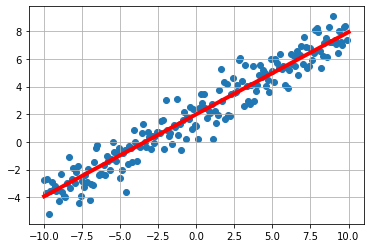

In [10]:
# Display the result
plt.scatter(x_data[::500], y_data[::500]) # On n'affiche qu'une donnée sur 500
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

In [11]:
print( model.trainable_variables )

[<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.5939271]], dtype=float32)>, <tf.Variable 'dense_1/bias:0' shape=(1,) dtype=float32, numpy=array([2.008543], dtype=float32)>]


In [12]:
print( model.trainable_variables[0] )

<tf.Variable 'dense_1/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[0.5939271]], dtype=float32)>


## Régression non linéaire avec un réseau de neurones  
https://lucidar.me/fr/neural-networks/curve-fitting-nonlinear-regression/Le réseau de neurones le plus simple avec TensorFlow

In [16]:
import numpy as np
import matplotlib.pyplot as plt
#from google.colab import files
import tensorflow as tf
import math

In [17]:
# Create noisy data
x_data = np.linspace(-10, 10, num=1000)
y_data = 0.1*x_data*np.cos(x_data) + 0.1*np.random.normal(size=1000)
y_data_clean = 0.1*x_data*np.cos(x_data)
print('Data created successfully')


Data created successfully


In [18]:
y_data.shape

(1000,)

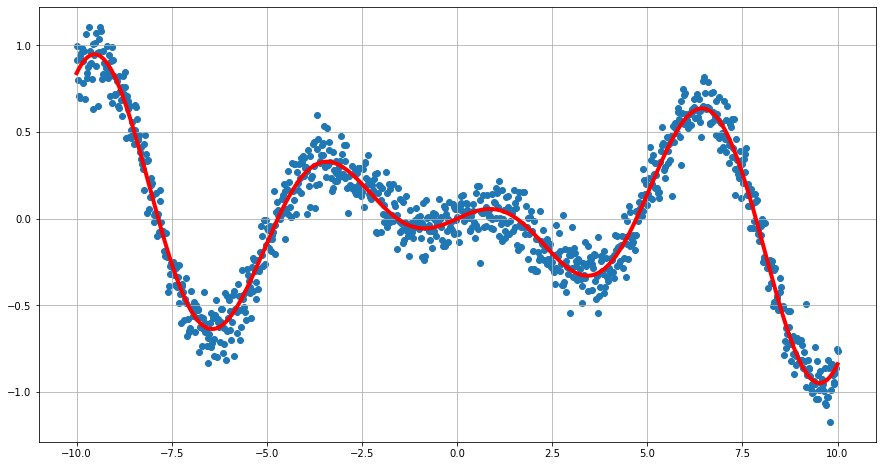

In [19]:
# Display the result
plt.figure(figsize=(15,8))

plt.scatter(x_data, y_data)
plt.plot(x_data, y_data_clean, 'r', linewidth=4)
plt.grid()
plt.show()

### Paramètres d'activations des neurones  
https://deeplylearning.fr/cours-theoriques-deep-learning/fonction-dactivation/  

    ELU
    SeLU
    PReLU
    Variante de ReLU ( Leaky ReLU, Randomized ReLU, Thresholded ReLU )
    ReLU
    TanH
    Sigmoid


### Création du model

In [24]:
# Create the model 
model = keras.Sequential()
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[1]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")

# Display the model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 1)                 2         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 65        
Total params: 4,355
Trainable params: 4,355
Non-trainable params: 0
_________________________________________________________________


In [25]:
# Training
modfit= model.fit( x_data, y_data, epochs=25, verbose=0) 

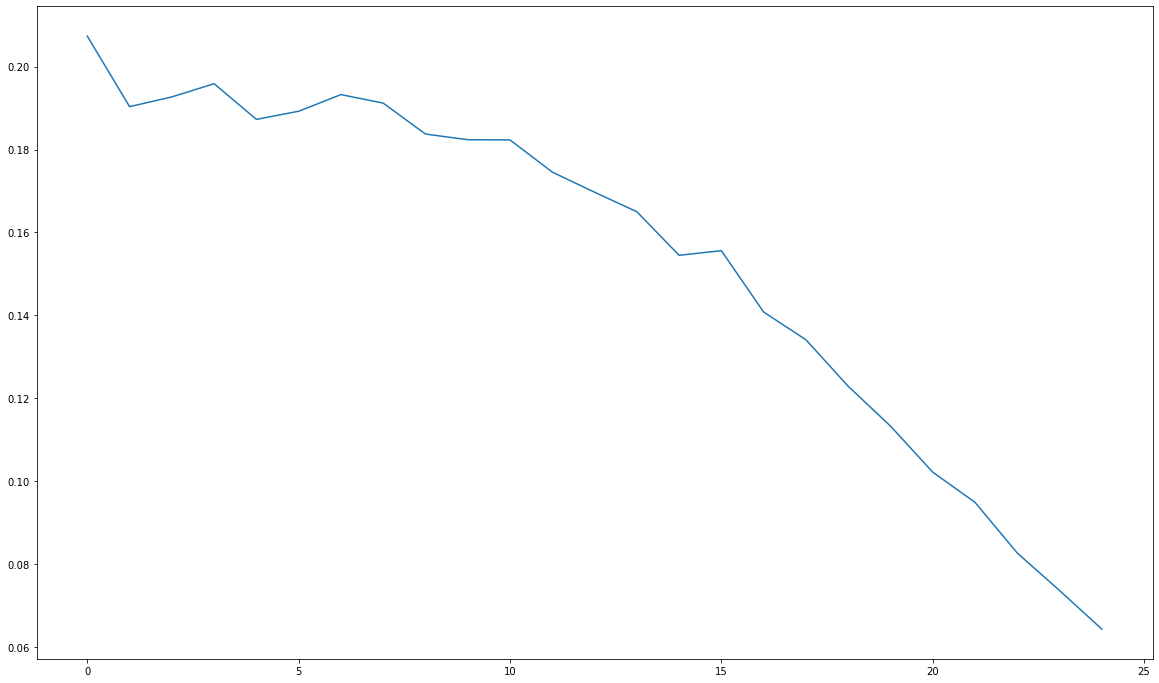

In [26]:
plt.figure(figsize= (20,12))
plt.plot(modfit.history['loss'])

In [27]:
# Compute the output 
y_predicted = model.predict(x_data)


In [28]:
y_data.shape

(1000,)

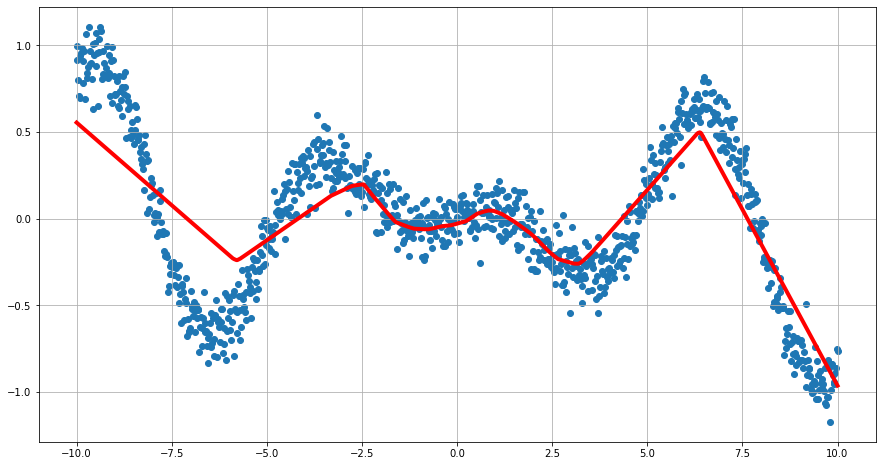

In [29]:


# Display the result
plt.figure(figsize=(15,8))
plt.scatter(x_data[::1], y_data[::1])
plt.plot(x_data, y_predicted, 'r', linewidth=4)
plt.grid()
plt.show()

In [30]:
# keras.losses.MAE(y_data,y_predicted)

mse = tf.keras.losses.MeanSquaredError()
print(mse(y_data, y_predicted).numpy())


0.27694663


In [31]:
loss = tf.keras.losses.mean_squared_error(y_data, y_predicted)


In [33]:
#loss

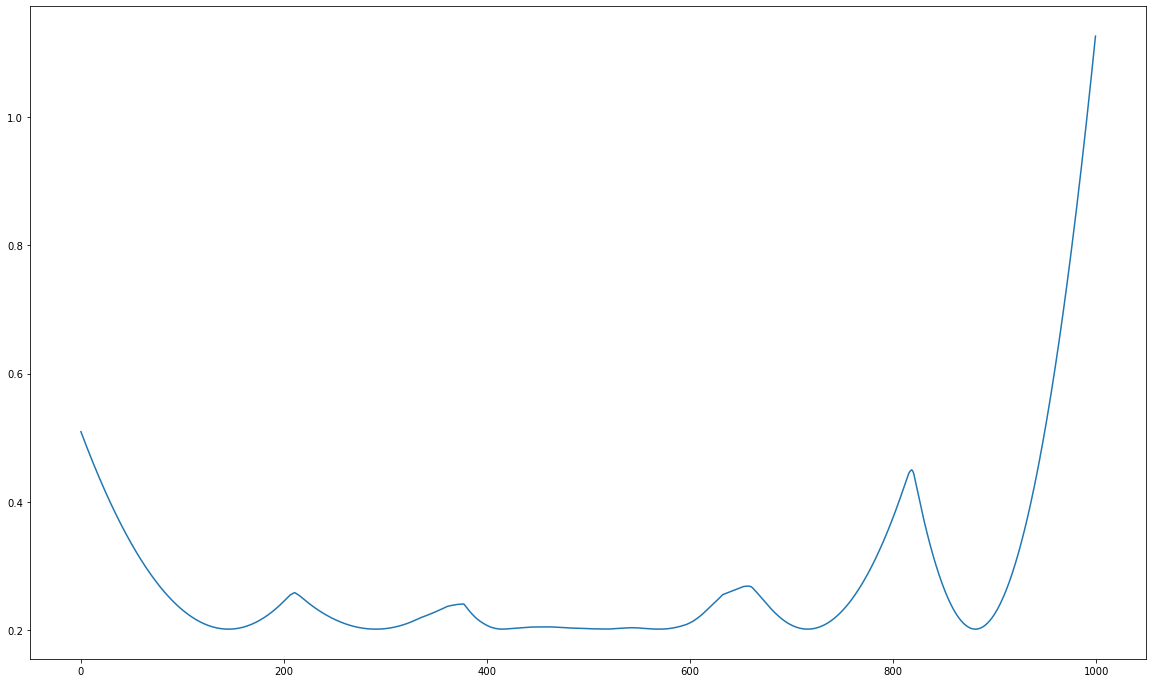

In [34]:
plt.figure(figsize= (20,12))
plt.plot(loss)

## Extension du blog: 2 variables en entrées

In [36]:
# Create noisy data 3 dimensions
#x_data1 = np.linspace(-10, 10, num=1000)
#x_data2 = np.linspace(-10, 10, num=1000)
t= np.linspace(-10, 10, num=1000)
x_data1 = np.sin(t)
x_data2 = t**2

x= np.array((x_data1,x_data2)).T

#z_data = 0.1*(x_data1 + x_data2)*np.cos(x_data2) + 0.1*np.random.normal(size=1000)
y_data = (x_data1**2 + x_data2**2)**(1/2) + 5*np.random.normal(size=1000)


In [37]:
#z_data.reshape(-1,1)
print(y_data.shape, x.shape)


(1000,) (1000, 2)


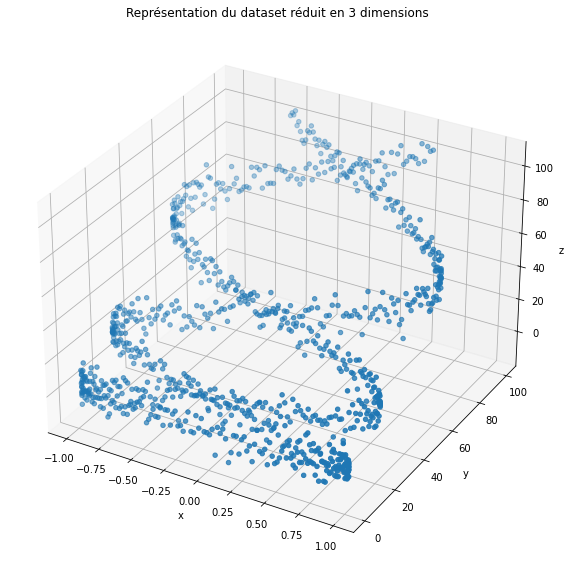

In [38]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data1,x_data2, y_data, marker='o')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Représentation du dataset réduit en 3 dimensions ")

plt.show()

In [39]:
# Create the model 
model = keras.Sequential()
#model.add(keras.layers.Dense(units = 2, activation = 'linear', input_shape=(1,)))
model.add(keras.layers.Dense(units = 1, activation = 'linear', input_shape=[2]))
model.add(keras.layers.Dense(units = 64, activation = 'relu'))
model.add(keras.layers.Dense(units = 1, activation = 'linear'))
model.compile(loss='mse', optimizer="adam")



In [40]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 1)                 3         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 65        
Total params: 196
Trainable params: 196
Non-trainable params: 0
_________________________________________________________________


In [41]:
# Learn
#x= x_data1
mod= model.fit(x , y_data, epochs= 40, verbose=0)
#x.shape

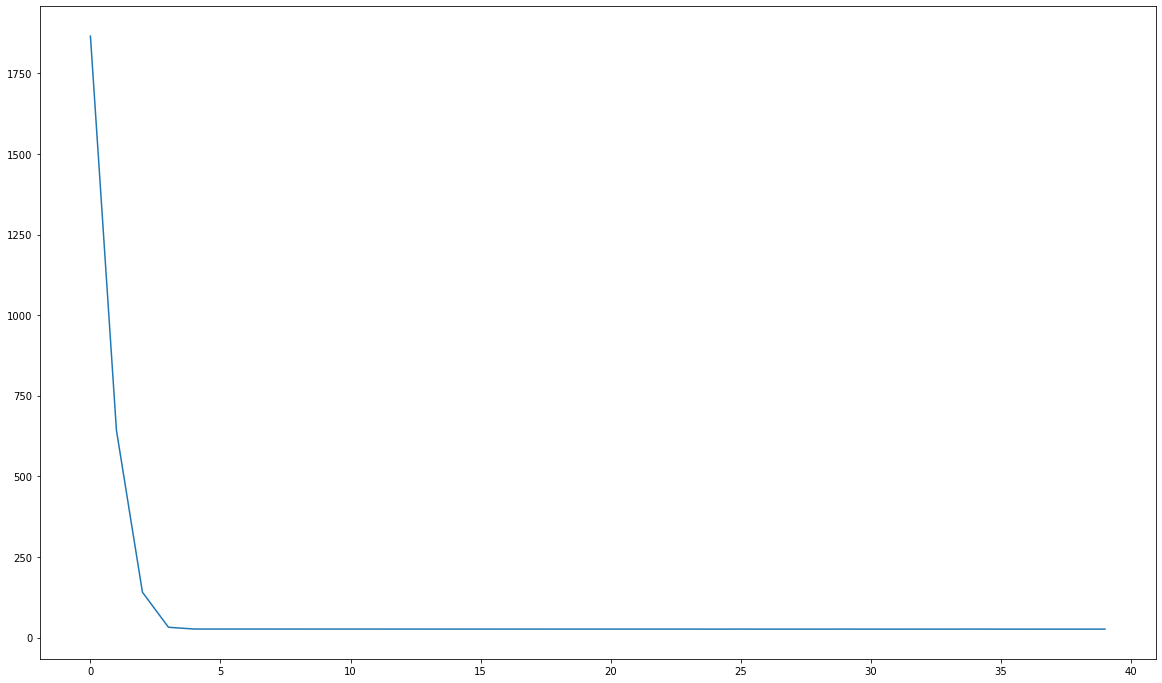

In [42]:
plt.figure(figsize= (20,12))
plt.plot(mod.history['loss'])

In [43]:
y_predicted = model.predict(x)
mse = tf.keras.losses.MeanSquaredError()
print(mse(y_data, y_predicted).numpy())

1809.0125


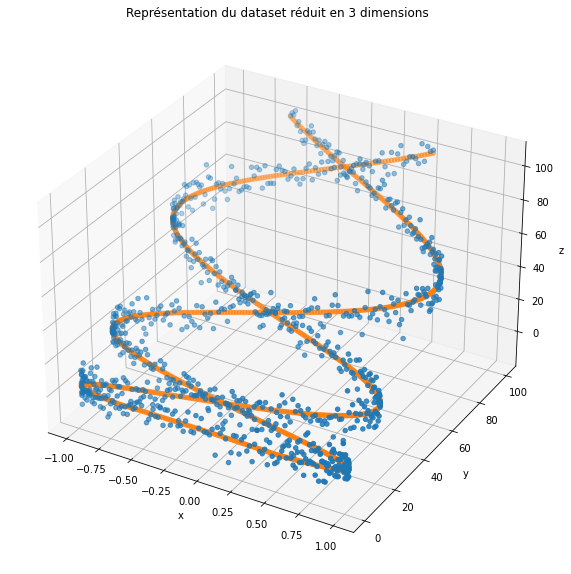

In [44]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax.scatter(x_data1, x_data2, y_data, marker='o', s= 20)
ax.scatter(x_data1,x_data2, y_predicted)
#ax.scatter(x_data1,x_data2, y_predicted[:,1])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Représentation du dataset réduit en 3 dimensions ")

plt.show()